# k-Nearest Neighbors algorithm

In [1]:
import numpy as np

This k-Nearest Neighbors can be done in 3 parts:

<li> Calculate Euclidean Distance.</li>
<li> Get Nearest Neighbors.</li>
<li> Make Predictions.</li>

## Calculate Euclidean Distance

We can calculate the straight line distance between two vectors using the Euclidean distance measure. It is calculated as the square root of the sum of the squared differences between the two vectors.

In [2]:
# Test distance function
dataset = np.array([[2.7810836, 2.550537003, 0],
                    [1.465489372, 2.362125076, 0],
                    [3.396561688, 4.400293529, 0],
                    [1.38807019, 1.850220317, 0],
                    [3.06407232, 3.005305973, 0],
                    [7.627531214, 2.759262235, 1],
                    [5.332441248, 2.088626775, 1],
                    [6.922596716, 1.77106367, 1],
                    [8.675418651, -0.242068655, 1],
                    [7.673756466, 3.508563011, 1]])
np.shape(dataset)

(10, 3)

In [3]:
def euclidean_distance(a , b):
    # a,b are two vector    
    
    distance = np.linalg.norm(a-b)       # Euclidean_distance formula
    
    return distance

In [4]:
row0 = dataset[0]
#print(row0)

for row in dataset:
    distance = euclidean_distance(row0[:-1], row[:-1]) # calculated distance between 1st row of dataset with remainig rows
    print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


## Get Nearest Neighbors

In [5]:
def get_neighbors(train, test_row, num_neighbors):
    
    distances = list()
    
    #find distance w.r.t test_row and append in distances
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))

    #sort distances
    distances.sort(key=lambda tup: tup[1])
        
    #append neighbors in list
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])

    return neighbors

In [6]:
neighbors = get_neighbors(dataset, dataset[0], 3)

for neighbor in neighbors:
    print(neighbor)

[2.7810836 2.550537  0.       ]
[3.06407232 3.00530597 0.        ]
[1.46548937 2.36212508 0.        ]


## Model

In [7]:
def predict_classification(train, test_row, num_neighbors):
    
    neighbors = get_neighbors(train, test_row, num_neighbors)
    
    #getting the output values from neighbours which is in last column.
    output_values = [row[-1] for row in neighbors]
    
    #finding the most represented class among the neighbors.
    prediction = max(set(output_values), key=output_values.count)
    
    return prediction

In [8]:
prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.


## loading  iris dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [10]:
iris_data = pd.read_csv(r"IRIS.csv")

iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
iris_data = np.array(iris_data)
print(np.shape(iris_data))
print(iris_data)

(150, 5)
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 

### converting last colume String to Integer 1, 2, 3 class

In [12]:
Y = np.zeros((150,1),int)
for s,i in zip(iris_data,range(150)):
    if s[-1] == 'Iris-setosa':
        Y[i] = 1
    elif s[-1] == 'Iris-versicolor':
        Y[i] = 2
    else:
        Y[i] = 3
print(Y)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


Updateing the last column of isir_data

In [13]:
data = np.concatenate((iris_data[:,:-1],Y),axis=1)
print(np.shape(data))
print(data)

(150, 5)
[[5.1 3.5 1.4 0.2 1]
 [4.9 3.0 1.4 0.2 1]
 [4.7 3.2 1.3 0.2 1]
 [4.6 3.1 1.5 0.2 1]
 [5.0 3.6 1.4 0.2 1]
 [5.4 3.9 1.7 0.4 1]
 [4.6 3.4 1.4 0.3 1]
 [5.0 3.4 1.5 0.2 1]
 [4.4 2.9 1.4 0.2 1]
 [4.9 3.1 1.5 0.1 1]
 [5.4 3.7 1.5 0.2 1]
 [4.8 3.4 1.6 0.2 1]
 [4.8 3.0 1.4 0.1 1]
 [4.3 3.0 1.1 0.1 1]
 [5.8 4.0 1.2 0.2 1]
 [5.7 4.4 1.5 0.4 1]
 [5.4 3.9 1.3 0.4 1]
 [5.1 3.5 1.4 0.3 1]
 [5.7 3.8 1.7 0.3 1]
 [5.1 3.8 1.5 0.3 1]
 [5.4 3.4 1.7 0.2 1]
 [5.1 3.7 1.5 0.4 1]
 [4.6 3.6 1.0 0.2 1]
 [5.1 3.3 1.7 0.5 1]
 [4.8 3.4 1.9 0.2 1]
 [5.0 3.0 1.6 0.2 1]
 [5.0 3.4 1.6 0.4 1]
 [5.2 3.5 1.5 0.2 1]
 [5.2 3.4 1.4 0.2 1]
 [4.7 3.2 1.6 0.2 1]
 [4.8 3.1 1.6 0.2 1]
 [5.4 3.4 1.5 0.4 1]
 [5.2 4.1 1.5 0.1 1]
 [5.5 4.2 1.4 0.2 1]
 [4.9 3.1 1.5 0.1 1]
 [5.0 3.2 1.2 0.2 1]
 [5.5 3.5 1.3 0.2 1]
 [4.9 3.1 1.5 0.1 1]
 [4.4 3.0 1.3 0.2 1]
 [5.1 3.4 1.5 0.2 1]
 [5.0 3.5 1.3 0.3 1]
 [4.5 2.3 1.3 0.3 1]
 [4.4 3.2 1.3 0.2 1]
 [5.0 3.5 1.6 0.6 1]
 [5.1 3.8 1.9 0.4 1]
 [4.8 3.0 1.4 0.3 1]
 [5.1 3.8 1.6 0.2 1]
 [4.

### Spliting iris data into 80% train set and 20% test set

In [14]:
train_ind = random.sample(range(150),120)
print("train_ind :")
print(train_ind)

test_ind = [i for i in range(150) if i not in train_ind]
print("test_ind :")
print(test_ind)

train_ind :
[48, 116, 147, 108, 102, 56, 12, 146, 58, 17, 50, 88, 148, 31, 92, 123, 38, 39, 45, 105, 6, 94, 28, 77, 16, 89, 2, 57, 76, 69, 33, 23, 42, 130, 139, 95, 14, 129, 1, 128, 25, 72, 134, 30, 135, 24, 53, 83, 67, 111, 10, 11, 43, 140, 9, 112, 21, 145, 114, 37, 34, 126, 110, 87, 103, 81, 65, 20, 71, 5, 119, 109, 73, 121, 74, 117, 78, 93, 107, 124, 64, 40, 106, 120, 122, 52, 75, 96, 125, 51, 133, 101, 59, 70, 44, 98, 62, 0, 136, 68, 47, 132, 15, 104, 99, 118, 41, 97, 54, 66, 82, 3, 35, 46, 113, 142, 80, 143, 85, 79]
test_ind :
[4, 7, 8, 13, 18, 19, 22, 26, 27, 29, 32, 36, 49, 55, 60, 61, 63, 84, 86, 90, 91, 100, 115, 127, 131, 137, 138, 141, 144, 149]


In [15]:
train_data = data[train_ind]
print(np.shape(train_data))
print(train_data)

test_data = data[test_ind]
print(np.shape(test_data))
print(test_data)


(120, 5)
[[5.3 3.7 1.5 0.2 1]
 [6.5 3.0 5.5 1.8 3]
 [6.5 3.0 5.2 2.0 3]
 [6.7 2.5 5.8 1.8 3]
 [7.1 3.0 5.9 2.1 3]
 [6.3 3.3 4.7 1.6 2]
 [4.8 3.0 1.4 0.1 1]
 [6.3 2.5 5.0 1.9 3]
 [6.6 2.9 4.6 1.3 2]
 [5.1 3.5 1.4 0.3 1]
 [7.0 3.2 4.7 1.4 2]
 [5.6 3.0 4.1 1.3 2]
 [6.2 3.4 5.4 2.3 3]
 [5.4 3.4 1.5 0.4 1]
 [5.8 2.6 4.0 1.2 2]
 [6.3 2.7 4.9 1.8 3]
 [4.4 3.0 1.3 0.2 1]
 [5.1 3.4 1.5 0.2 1]
 [4.8 3.0 1.4 0.3 1]
 [7.6 3.0 6.6 2.1 3]
 [4.6 3.4 1.4 0.3 1]
 [5.6 2.7 4.2 1.3 2]
 [5.2 3.4 1.4 0.2 1]
 [6.7 3.0 5.0 1.7 2]
 [5.4 3.9 1.3 0.4 1]
 [5.5 2.5 4.0 1.3 2]
 [4.7 3.2 1.3 0.2 1]
 [4.9 2.4 3.3 1.0 2]
 [6.8 2.8 4.8 1.4 2]
 [5.6 2.5 3.9 1.1 2]
 [5.5 4.2 1.4 0.2 1]
 [5.1 3.3 1.7 0.5 1]
 [4.4 3.2 1.3 0.2 1]
 [7.4 2.8 6.1 1.9 3]
 [6.9 3.1 5.4 2.1 3]
 [5.7 3.0 4.2 1.2 2]
 [5.8 4.0 1.2 0.2 1]
 [7.2 3.0 5.8 1.6 3]
 [4.9 3.0 1.4 0.2 1]
 [6.4 2.8 5.6 2.1 3]
 [5.0 3.0 1.6 0.2 1]
 [6.3 2.5 4.9 1.5 2]
 [6.1 2.6 5.6 1.4 3]
 [4.8 3.1 1.6 0.2 1]
 [7.7 3.0 6.1 2.3 3]
 [4.8 3.4 1.9 0.2 1]
 [5.5 2.3 4.0 1.3 2]
 [6.

### Predicting answer for test set

kNN model does not required train early it is lassy learning algorithem

In [16]:
y = test_data[25]
k = 3
prediction = predict_classification(train_data, y, k)
print('Expected %d, Got %d.' % (y[-1], prediction))

if prediction == 1:
    print('Iris-setosa')
elif prediction == 2:
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Expected 3, Got 3.
Iris-virginica


# Calculating accuracy for k = 3

In [17]:
count = 0
for i,y in zip(range(test_data.shape[0]),test_data):
    prediction = predict_classification(train_data,test_data[i],3)
    if y[-1] == prediction:
        count += 1

print(f"prediction accuracy = ",count*100/30)

prediction accuracy =  100.0


### Predicting accuracy for multiple value of 'k'

In [18]:
prediction_accuracy = np.zeros((train_data.shape[0]),float)
for k in range(1,train_data.shape[0]):
    count = 0
    for i,y in zip(range(test_data.shape[0]),test_data):
        prediction = predict_classification(train_data,test_data[i],k)
        if y[-1] == prediction:
            count += 1
    prediction_accuracy[k-1] = count*100/30;

Text(0, 0.5, 'Prediction Accuracy')

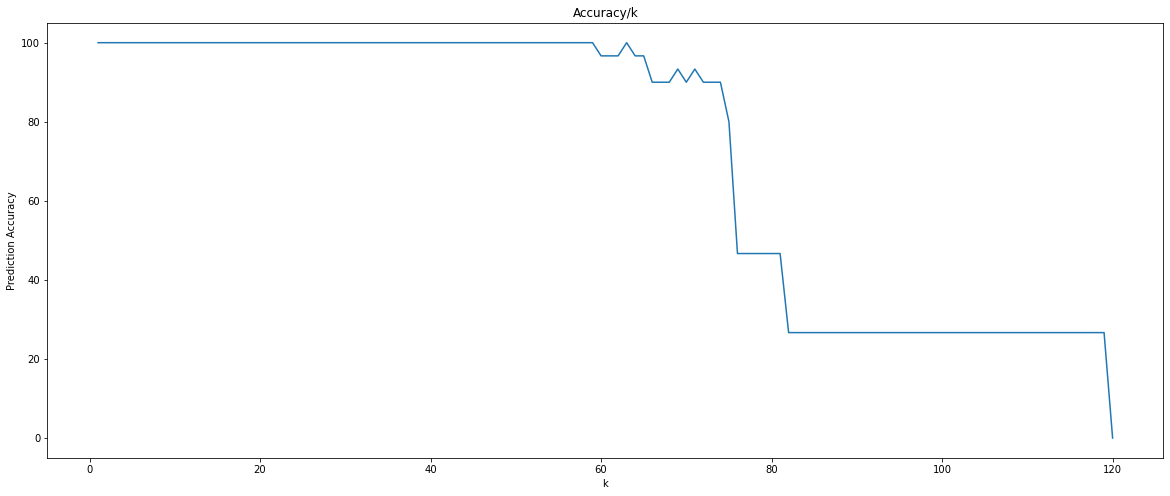

In [19]:
plt.figure(figsize = (20,8))

k = range(1,121)
plt.plot(k,prediction_accuracy)
plt.title('Accuracy/k')
plt.xlabel('k')
plt.ylabel('Prediction Accuracy')